# HW3 Pattern Recognition
### 2019150445 신백록



<br/><br/><br/>
<hr style="border: 5px solid #990000;" />
<hr style="border: 1px solid #dbbcac;" />


## 1. Download MNIST dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X,y),(X_test,y_test)=mnist.load_data()
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

Init Plugin
Init Graph Optimizer
Init Kernel
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=1)

In [3]:
print(X_train.shape)
print(X_val.shape)

(54000, 28, 28)
(6000, 28, 28)


By train_test_split function, I assigned 10% of training set to X_val, y_val.

In [4]:
X_train=X_train.reshape(-1,28*28)
X_val=X_val.reshape(-1,28*28)
X_test=X_test.reshape(-1,28*28)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(54000, 784)
(6000, 784)
(10000, 784)


In [5]:
from tensorflow.keras.utils import to_categorical

X_train=X_train/255.
X_val=X_val/255.
X_test=X_test/255.

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)
print(y_train.shape)

(54000, 10)


I reshaped the image data to flatten data to use MLP. And by to_categorical function, I made y to be one-hot encoded.

<br/><br/><br/>
<hr style="border: 5px solid #990000;" />
<hr style="border: 1px solid #dbbcac;" />


## 2. Explain Activation Function

The activation function makes the linear combination $w^Tx$ to $g(w^Tx)$ to make the linear function non-linear. Since linear functions cannot create a non-linear model, activation functions are used. In fact, if each layer is connected only by a linear combination without an activation function, the result will be the same as using a single linear combination even if several hidden layers are created.

For example, the sigmoid function transforms the result of a linear combination non-linearly so that it falls within the range 0 to 1. Therefore, it is often used for the last MLP layer in a binary classifcation model that classifies 0 or 1.

If the result of the linear combination is less than 0, the ReLU function converts it to 0, and if it is greater than 0, the result is converted as it is. Since the differential value is 0 or 1, gradient vanishing and exploding phenomena that occur when the layer is deep can be prevented. In addition, since the differential calculation is simple, it has the advantage of fast learning speed.

In conclusion, activation functions such as sigmoid and ReLU functions are used to create non-linear models that cannot be expressed as linear combinations.

<br/><br/><br/>
<hr style="border: 5px solid #990000;" />
<hr style="border: 1px solid #dbbcac;" />


## 3. Explain MLP

Let's define input value of unit j as $x_j$, weight on link from unit j to unit i as $\theta_{ij}$, activation function as $g(.)$, activation value of unit i as $a_i$

Assume there are 1 input layer and 1 hidden layer with 3 nodes each excluding bias node. Then nodes of input layer is $x_0$(actually it is bias term 1), $x_1$, $x_2$ and $x_3$. The node for next layer $a_i$ is defined with linear combination of input nodes and activation function. For example, $a_1 = g(\theta_{10}x_0+\theta_{11}x_1+\theta_{12}x_2+\theta_{13}x_3)$ and $a_2 = g(\theta_{20}x_0+\theta_{21}x_1+\theta_{22}x_2+\theta_{23}x_3)$

Here, our purpose is to find optimal parameter $\theta_{ij}$. So first, we initialize $\theta_{ij}$ to any value or something. Then we compute error at last output layer for initialized parameter $\theta$. And compute error for each node at each layer and by optimization algorithm(gradient descent algorithm or something), move $\theta_{ij}$ to reduce the error. Then by that $\theta$ we obtain, we again do forward propagation and compute error and back propagation again and again until obtain optimal parameter.

<br/><br/><br/>
<hr style="border: 5px solid #990000;" />
<hr style="border: 1px solid #dbbcac;" />


## 4. Training and Evaluation

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


2021-12-01 16:42:44.159086: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-01 16:42:44.159170: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


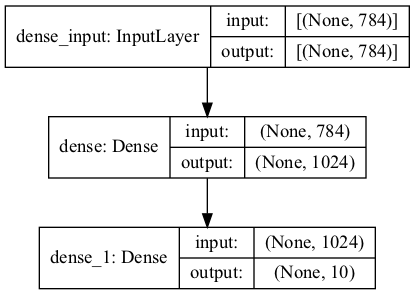

In [7]:
model=Sequential()
model.add(Dense(1024, input_dim=784, activation='relu'))
model.add(Dense(10, activation='relu'))
model.summary()

plot_model(model,show_shapes=True)

In [8]:
import keras
test_acc=[]
class TestCallback(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        global test_acc
        x, y = self.test_data
        test_acc.append(self.model.evaluate(x, y, verbose=0)[1])

By callback function, test accuracy for each epoch is calculated and saved in test_acc

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [10]:
history=model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val),callbacks=[TestCallback((X_test, y_test))])
history_out=history.history

Epoch 1/20
  1/844 [..............................] - ETA: 2:23 - loss: 10.1765 - accuracy: 0.0938

2021-12-01 16:42:46.159026: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-01 16:42:46.159177: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-01 16:42:46.253955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


844/844 [==============================] - ETA: 0s - loss: 4.9966 - accuracy: 0.6053

2021-12-01 16:42:52.341683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


844/844 [==============================] - 6s 7ms/step - loss: 4.9966 - accuracy: 0.6053 - val_loss: 5.2325 - val_accuracy: 0.4743
Epoch 2/20
844/844 [==============================] - 6s 7ms/step - loss: 4.9795 - accuracy: 0.6016 - val_loss: 5.0079 - val_accuracy: 0.6152
Epoch 3/20
844/844 [==============================] - 6s 7ms/step - loss: 4.8949 - accuracy: 0.6384 - val_loss: 4.8330 - val_accuracy: 0.6617
Epoch 4/20
844/844 [==============================] - 6s 7ms/step - loss: 4.7865 - accuracy: 0.6187 - val_loss: 5.1388 - val_accuracy: 0.5480
Epoch 5/20
844/844 [==============================] - 6s 7ms/step - loss: 4.6125 - accuracy: 0.6511 - val_loss: 4.8430 - val_accuracy: 0.6723
Epoch 6/20
844/844 [==============================] - 6s 7ms/step - loss: 4.8337 - accuracy: 0.6263 - val_loss: 4.8255 - val_accuracy: 0.6503
Epoch 7/20
844/844 [==============================] - 6s 7ms/step - loss: 4.7200 - accuracy: 0.6364 - val_loss: 4.8310 - val_accuracy: 0.6683
Epoch 8/20
844/84

/var/folders/9r/7f1bw3q15yz7435178lsgb5w0000gp/T/ipykernel_3430/2521518520.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(accuracy_val,'b', color='r', label='validation acc' )
/var/folders/9r/7f1bw3q15yz7435178lsgb5w0000gp/T/ipykernel_3430/2521518520.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(test_acc, 'b', color='y', label='test acc')


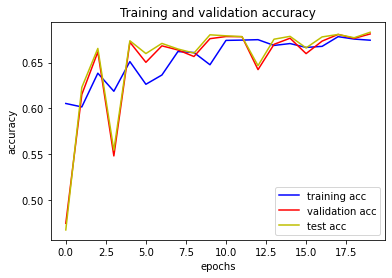

In [11]:
import matplotlib.pyplot as plt

accuracy=history_out['accuracy']
accuracy_val=history_out['val_accuracy']

plt.clf()
plt.plot(accuracy,'b',label='training acc')
plt.plot(accuracy_val,'b', color='r', label='validation acc' )
plt.plot(test_acc, 'b', color='y', label='test acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

We can see there are no convergences occur for train, validation, test set for first 12 epochs. But after 12 epoch, we can see some convergence for train, validation, test data set. But accuracy is too low which is underfitted.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

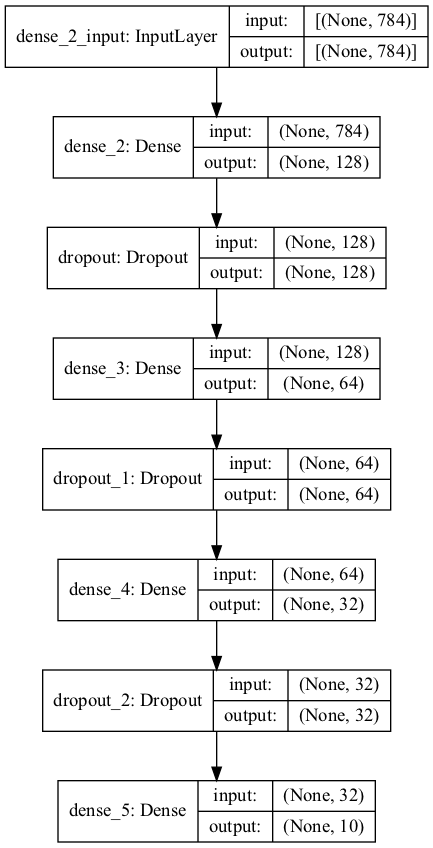

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

model=Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()
plot_model(model,show_shapes=True)

Input dim is set to 784 because there are 784 characteristic variables.

The first Dense layer was fitted with dimension 128 and the activation function was relu.

Dropout was given to prevent overfitting, so that each node had a value of 0 with a 40% probability.

The second Dense layer is set to dimension 64, and the activation function is relu as above, and gave a dropout of 0.3.

The third Dense layer is set to dimension 32, activation function relu, and dropout 0.2.

The last Dense layer has to extract the probability for 10 labels, so dimension=10, activation='softmax' was given.

In order to prevent the bottleneck phenomenon, the dimension gradually decreases from 128, and finally at the last layer, 10 nodes are estimated from 32 nodes.

In [14]:
test_acc=[]
#initialize test_acc list.

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback_list=[TestCallback((X_test, y_test)),EarlyStopping(monitor='val_accuracy',patience=4),ModelCheckpoint(filepath='model.h5', monitor='val_accuracy',save_best_only=True)]

Earlystopping and model checkpoint were called to give callback, and to prevent overfitting, learning was stopped if validation_accuracy did not improve for 4 epochs, and the model was saved when val_accuracy was improved.

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=64, callbacks=callback_list, validation_split=0.3)
history_out=history.history
history_out.keys()

Epoch 1/30
 16/591 [..............................] - ETA: 4s - loss: 2.2107 - accuracy: 0.1660

2021-12-01 16:49:06.047873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


591/591 [==============================] - ETA: 0s - loss: 0.7558 - accuracy: 0.7616

2021-12-01 16:49:09.952388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


591/591 [==============================] - 5s 8ms/step - loss: 0.7558 - accuracy: 0.7616 - val_loss: 0.2443 - val_accuracy: 0.9298
Epoch 2/30
591/591 [==============================] - 5s 8ms/step - loss: 0.3655 - accuracy: 0.9007 - val_loss: 0.1977 - val_accuracy: 0.9435
Epoch 3/30
591/591 [==============================] - 5s 8ms/step - loss: 0.2877 - accuracy: 0.9216 - val_loss: 0.1555 - val_accuracy: 0.9557
Epoch 4/30
591/591 [==============================] - 5s 8ms/step - loss: 0.2489 - accuracy: 0.9308 - val_loss: 0.1460 - val_accuracy: 0.9578
Epoch 5/30
591/591 [==============================] - 5s 8ms/step - loss: 0.2216 - accuracy: 0.9391 - val_loss: 0.1252 - val_accuracy: 0.9641
Epoch 6/30
591/591 [==============================] - 5s 8ms/step - loss: 0.2003 - accuracy: 0.9463 - val_loss: 0.1308 - val_accuracy: 0.9622
Epoch 7/30
591/591 [==============================] - 5s 8ms/step - loss: 0.1868 - accuracy: 0.9484 - val_loss: 0.1158 - val_accuracy: 0.9669
Epoch 8/30
591/59

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

/var/folders/9r/7f1bw3q15yz7435178lsgb5w0000gp/T/ipykernel_3430/2521518520.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(accuracy_val,'b', color='r', label='validation acc' )
/var/folders/9r/7f1bw3q15yz7435178lsgb5w0000gp/T/ipykernel_3430/2521518520.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(test_acc, 'b', color='y', label='test acc')


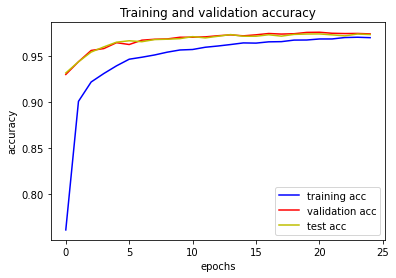

In [17]:
import matplotlib.pyplot as plt

accuracy=history_out['accuracy']
accuracy_val=history_out['val_accuracy']

plt.clf()
plt.plot(accuracy,'b',label='training acc')
plt.plot(accuracy_val,'b', color='r', label='validation acc' )
plt.plot(test_acc, 'b', color='y', label='test acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

It converges neatly without any vibration.